In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def load_dataset():
    df = pd.read_csv('../Online Retail/dataset.csv')
    
    return df

In [2]:
#hold
#data.head()
#data.info()
#data.shape
# data.isna().sum()
# data.nunique()

In [ ]:
def preprocessing(data):
    #drop null value
    data.dropna(subset=['Description','Customer ID'],axis=0, inplace=True)
    
    return data

In [ ]:
#max_date
max_date = data['InvoiceDate'].max()
Cust_aggregate = data.groupby('Customer ID').agg({'InvoiceDate':[('Max Date','max'),('Frequency','count')],'Price':[("Amount",'sum')]})

In [4]:
#Data Understanding & Preparation

In [ ]:
def transformation(data):
    
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
    data['InvoiceDate'] = data['InvoiceDate'].dt.date
    recency = Cust_aggregate['Max Date'].apply(lambda x: (max_date - x).days)
    return recency

In [9]:
# Cust_aggregate.loc[Cust_aggregate['Frequency']>=13097].describe()

In [12]:
# Recency, Frequency, Monetary

In [14]:
Cust_aggregate.columns = Cust_aggregate.columns.droplevel(0)
Cust_aggregate = Cust_aggregate.reset_index()

In [15]:
Cust_aggregate.head(2)

,Customer ID,Max Date,Frequency,Amount
0,12346.0,2011-01-18,48,580.44
1,12347.0,2011-12-07,253,644.16


0       325
1         2
2        75
3        18
4       310
       ... 
5937      3
5938    429
5939    660
5940    476
5941     42
Name: Recency, Length: 5942, dtype: int64

In [17]:
Cust_aggregate.describe()

,Customer ID,Frequency,Amount,Recency
count,5942.000000,5942.000000,5942.000000,5942.000000
mean,15316.500000,138.735106,510.101179,202.457085
std,1715.451981,359.689585,1915.919969,211.881245
min,12346.000000,1.000000,0.000000,0.000000
25%,13831.250000,21.000000,66.535000,24.000000
50%,15316.500000,53.000000,174.115000,95.500000
75%,16801.750000,144.000000,464.677500,381.000000
max,18287.000000,13097.000000,71343.060000,738.000000


In [19]:
#Data Distribution : Frequency

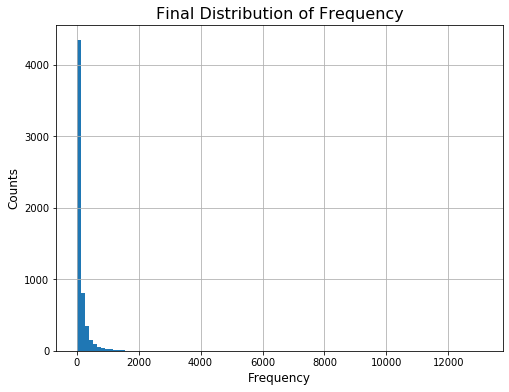

In [20]:
fig, ax = plt.subplots(figsize=(8,6));
Cust_aggregate.Frequency.hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Frequency", fontsize=16)
ax.set_xlabel("Frequency", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

In [21]:
#distribution of Amount

Cust_aggregate.loc[Cust_aggregate['Frequency']>=13097].describe()

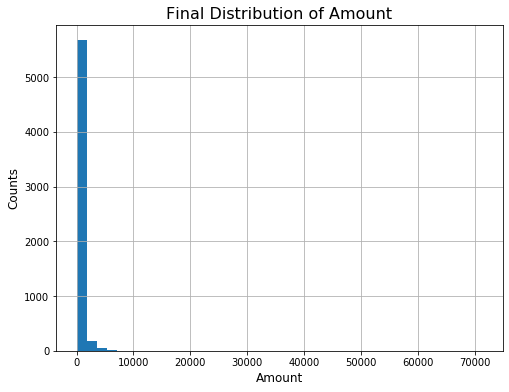

In [22]:
fig, ax = plt.subplots(figsize=(8,6));
Cust_aggregate.Amount.hist(bins=40,ax=ax)
ax.set_title("Final Distribution of Amount", fontsize=16)
ax.set_xlabel("Amount", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

In [23]:
#Recency

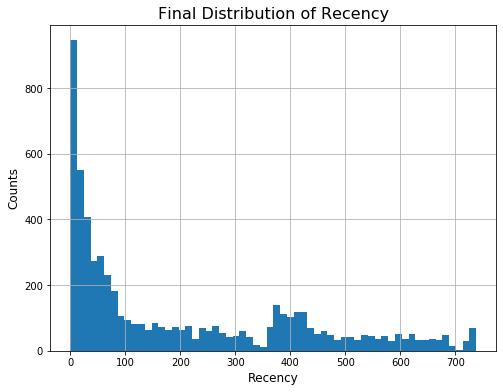

In [24]:
fig, ax = plt.subplots(figsize=(8,6));
Cust_aggregate.Recency.hist(bins=60,ax=ax)
ax.set_title("Final Distribution of Recency", fontsize=16)
ax.set_xlabel("Recency", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

In [25]:
#RFM - AR

In [26]:
# Cust_AR = pd.DataFrame()
Cust_Age = data.groupby('Customer ID')['InvoiceDate'].min().reset_index()
Cust_Age['Age'] = Cust_Age['InvoiceDate'].apply(lambda x: (max_date-x).days/365)
Cust_Age.head(2)

,Customer ID,InvoiceDate,Age
0,12346.0,2009-12-14,1.986301
1,12347.0,2010-10-31,1.106849


In [27]:
Cust_return = data[['Customer ID','InvoiceDate']].drop_duplicates()
Cust_return = Cust_return[['Customer ID','InvoiceDate']].drop_duplicates().set_index('Customer ID').diff()
Cust_return['Nrow'] = Cust_return.groupby('Customer ID').cumcount()+1 

In [28]:
Cust_Age_Return = pd.merge(Cust_Age, Cust_return, on="Customer ID")
Cust_Age_Return.columns =['Customer ID','Invoice Date', 'Age','Return','Nrow']
Cust_Age_Return.head(2)

,Customer ID,Invoice Date,Age,Return,Nrow
0,12346.0,2009-12-14,1.986301,"1 day, 0:00:00",1
1,12346.0,2009-12-14,1.986301,0:00:00,2


In [29]:
#merge with data Cust_aggregate
Cust_aggregate = pd.merge(Cust_aggregate, Cust_Age_Return, on="Customer ID", how="left")
Cust_aggregate.isna().sum()

Customer ID     0
Max Date        0
Frequency       0
Amount          0
Recency         0
Invoice Date    0
Age             0
Return          1
Nrow            0
dtype: int64

In [30]:
Cust_aggregate

,Customer ID,Max Date,Frequency,Amount,Recency,Invoice Date,Age,Return,Nrow
0,12346.0,2011-01-18,48,580.44,325,2009-12-14,1.986301,"1 day, 0:00:00",1
1,12346.0,2011-01-18,48,580.44,325,2009-12-14,1.986301,0:00:00,2
2,12346.0,2011-01-18,48,580.44,325,2009-12-14,1.986301,"12 days, 0:00:00",3
3,12346.0,2011-01-18,48,580.44,325,2009-12-14,1.986301,0:00:00,4
4,12346.0,2011-01-18,48,580.44,325,2009-12-14,1.986301,0:00:00,5
...,...,...,...,...,...,...,...,...,...
38497,18287.0,2011-10-28,156,348.89,42,2009-12-01,2.021918,0:00:00,3
38498,18287.0,2011-10-28,156,348.89,42,2009-12-01,2.021918,0:00:00,4
38499,18287.0,2011-10-28,156,348.89,42,2009-12-01,2.021918,0:00:00,5
38500,18287.0,2011-10-28,156,348.89,42,2009-12-01,2.021918,0:00:00,6


In [31]:
#remove first transaction except for the only one transaction
Cust_aggregate = Cust_aggregate[((Cust_aggregate['Nrow']!=1) &(Cust_aggregate['Frequency']>1))] 

In [32]:
Cust_aggregate['Return'] = Cust_aggregate['Return'].apply(lambda x: x.days)
# Cust_aggregate.drop(['Invoice Date','Nrow'],axis=1, inplace=True)
Cust_aggregate.groupby('Customer ID').agg({'Age':'min','Return':'median'}).reset_index()

C:\Users\ADOH\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Customer ID,Age,Return
0,12346.0,1.986301,0.0
1,12347.0,1.106849,0.0
2,12348.0,1.200000,0.0
3,12349.0,2.013699,0.0
4,12352.0,1.073973,0.0
...,...,...,...
4393,18282.0,0.345205,0.0
4394,18283.0,1.802740,0.0
4395,18284.0,1.180822,0.0
4396,18286.0,1.980822,0.0


In [33]:
Cust_aggregate[['Customer ID','Invoice Date','Return']].groupby(['Customer ID','Invoice Date']).agg({'Return':'mean'})

,,Return
Customer ID,Invoice Date,
12346.0,2009-12-14,1.200000
12347.0,2010-10-31,0.142857
12348.0,2010-09-27,0.000000
12349.0,2009-12-04,0.250000
12352.0,2010-11-12,0.000000
...,...,...
18282.0,2011-08-05,0.000000
18283.0,2010-02-19,0.000000
18284.0,2010-10-04,0.000000


In [34]:
# Cust_return = Cust_return.loc[Cust_return['Nrow']>1].reset_index()

In [35]:
# Cust_return.iloc[:50]

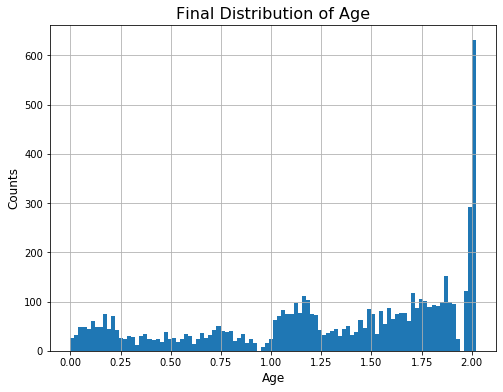

In [36]:
#distribution for Age

fig, ax = plt.subplots(figsize=(8,6));
Cust_Age.Age.hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Age", fontsize=16)
ax.set_xlabel("Age", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

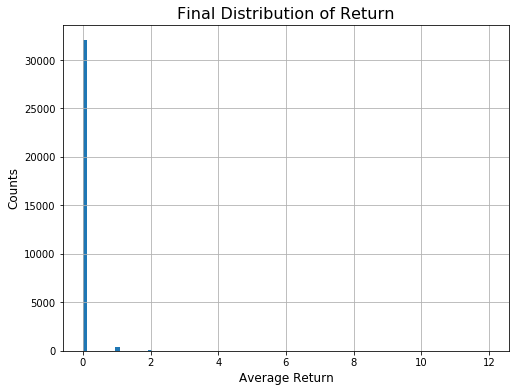

In [37]:
#distribution for Return

fig, ax = plt.subplots(figsize=(8,6));
Cust_aggregate.Return.hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Return", fontsize=16)
ax.set_xlabel("Average Return", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

In [38]:
#Scoring

In [39]:
RFM_scores = Cust_aggregate

In [40]:
RFM_scores.isna().sum()

Customer ID     0
Max Date        0
Frequency       0
Amount          0
Recency         0
Invoice Date    0
Age             0
Return          0
Nrow            0
dtype: int64

In [41]:
RFM_scores.describe()

,Customer ID,Frequency,Amount,Recency,Age,Return,Nrow
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,15248.098618,723.074724,2812.983092,69.310197,1.697636,0.019779,15.876136
std,1718.288745,1716.294818,8148.212400,118.747621,0.446105,0.186894,26.688608
min,12346.000000,2.000000,0.850000,0.000000,0.019178,0.000000,2.000000
25%,13769.000000,112.000000,346.435000,4.000000,1.542466,0.000000,4.000000
50%,15159.000000,261.000000,850.940000,18.000000,1.893151,0.000000,7.000000
75%,16742.000000,583.000000,1936.350000,66.000000,2.008219,0.000000,16.000000
max,18287.000000,13097.000000,71343.060000,736.000000,2.021918,12.000000,285.000000


In [42]:
RFM_scores['R']    = pd.qcut(RFM_scores['Recency'], 3, labels=[3, 2, 1])
RFM_scores['F']    = pd.qcut(RFM_scores['Frequency'], 3, labels=[1, 2, 3])
RFM_scores['M']    = pd.qcut(RFM_scores['Amount'], 3, labels=[1, 2, 3])
RFM_scores['A']    = pd.qcut(RFM_scores['Age'], 3, labels=[1, 2, 3])
RFM_scores['Re']    = pd.qcut(RFM_scores['Return'].rank(method='first'), 3, labels=[3, 2, 1])

C:\Users\ADOH\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ADOH\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADOH\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [43]:
RFM_scores.describe()

,Customer ID,Frequency,Amount,Recency,Age,Return,Nrow
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,15248.098618,723.074724,2812.983092,69.310197,1.697636,0.019779,15.876136
std,1718.288745,1716.294818,8148.212400,118.747621,0.446105,0.186894,26.688608
min,12346.000000,2.000000,0.850000,0.000000,0.019178,0.000000,2.000000
25%,13769.000000,112.000000,346.435000,4.000000,1.542466,0.000000,4.000000
50%,15159.000000,261.000000,850.940000,18.000000,1.893151,0.000000,7.000000
75%,16742.000000,583.000000,1936.350000,66.000000,2.008219,0.000000,16.000000
max,18287.000000,13097.000000,71343.060000,736.000000,2.021918,12.000000,285.000000


In [44]:
RFM_scores['R'] = RFM_scores['R'].astype('int')
RFM_scores['F'] = RFM_scores['F'].astype('int')
RFM_scores['M'] = RFM_scores['M'].astype('int')
RFM_scores['A'] = RFM_scores['A'].astype('int')
RFM_scores['Re'] = RFM_scores['Re'].astype('int')

C:\Users\ADOH\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ADOH\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADOH\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [45]:
RFM_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 1 to 38501
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer ID   32560 non-null  float64
 1   Max Date      32560 non-null  object 
 2   Frequency     32560 non-null  int64  
 3   Amount        32560 non-null  float64
 4   Recency       32560 non-null  int64  
 5   Invoice Date  32560 non-null  object 
 6   Age           32560 non-null  float64
 7   Return        32560 non-null  int64  
 8   Nrow          32560 non-null  int64  
 9   R             32560 non-null  int32  
 10  F             32560 non-null  int32  
 11  M             32560 non-null  int32  
 12  A             32560 non-null  int32  
 13  Re            32560 non-null  int32  
dtypes: float64(3), int32(5), int64(4), object(2)
memory usage: 3.1+ MB


In [46]:
RFM_scores['Re'].unique()

array([3, 1, 2])

In [47]:
#combine all scores

In [48]:
RFM_scores['rfm_score'] = RFM_scores['R'] + RFM_scores['F'] + RFM_scores['M']+ RFM_scores['A']+ RFM_scores['Re']

C:\Users\ADOH\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
RFM_scores['rfm_score'].unique()

array([ 9,  7, 11, 13, 10,  8, 14, 12,  5, 15,  6], dtype=int32)

In [50]:
RFM_scores.rfm_score.value_counts().sort_values()

5      957
15    1418
14    2078
6     2429
12    3471
10    3560
9     3587
13    3701
11    3703
7     3707
8     3949
Name: rfm_score, dtype: int64

In [51]:
RFM_scores.groupby('rfm_score')[['Recency','Frequency','Amount','Age','Return']].describe().T

rfm_score                5            6            7             8   \
Recency   count  957.000000  2429.000000  3707.000000   3949.000000   
          mean   199.785789   166.115685   136.397356    104.170676   
          std    141.865327   155.381706   149.105728    141.517788   
          min     42.000000     9.000000     0.000000      0.000000   
          25%     74.000000    50.000000    25.000000     18.000000   
          50%    159.000000   100.000000    72.000000     43.000000   
          75%    301.000000   247.000000   192.000000    113.000000   
          max    596.000000   686.000000   724.000000    736.000000   
Frequency count  957.000000  2429.000000  3707.000000   3949.000000   
          mean    56.360502    72.550021    94.209334    147.681438   
          std     35.469308    42.460308    68.586074    102.565196   
          min      2.000000     2.000000     2.000000      2.000000   
          25%     29.000000    38.000000    45.000000     68.000000   
          50%     51.000000    68.000000    81.000000    129.000000   
          75%     82.000000   104.000000   127.000000    198.000000   
          max    149.000000   220.000000   407.000000    548.000000   
Amount    count  957.000000  2429.000000  3707.000000   3949.000000   
          mean   171.354044   221.181096   287.669990    464.439292   
          std    108.346732   138.106443   200.679362    405.059735   
          min      0.850000     2.730000     2.240000      3.010000   
          25%     86.330000   109.800000   143.410000    219.321000   
          50%    155.310000   208.800000   252.670000    380.140000   
          75%    238.550000   312.430000   392.200000    624.950000   
          max    466.100000   883.900000  1335.160000  14573.160000   
Age       count  957.000000  2429.000000  3707.000000   3949.000000   
          mean     1.225382     1.390558     1.406629      1.539119   
          std      0.386579     0.471853     0.525983      0.486343   
          min      0.164384     0.041096     0.038356      0.024658   
          25%      1.027397     1.123288     1.131507      1.249315   
          50%      1.254795     1.504110     1.564384      1.726027   
          75%      1.564384     1.767123     1.824658      1.904110   
          max      1.709589     2.000000     2.021918      2.021918   
Return    count  957.000000  2429.000000  3707.000000   3949.000000   
          mean     0.056426     0.035406     0.024009      0.015700   
          std      0.256613     0.203911     0.263268      0.150166   
          min      0.000000     0.000000     0.000000      0.000000   
          25%      0.000000     0.000000     0.000000      0.000000   
          50%      0.000000     0.000000     0.000000      0.000000   
          75%      0.000000     0.000000     0.000000      0.000000   
          max      2.000000     2.000000    12.000000      3.000000   

rfm_score                 9             10            11            12  \
Recency   count  3587.000000   3560.000000   3703.000000   3471.000000   
          mean     85.074157     50.403933     32.423711     18.917027   
          std     129.012175     85.126759     62.683736     42.813893   
          min       0.000000      0.000000      0.000000      0.000000   
          25%       9.000000      8.000000      7.000000      2.000000   
          50%      31.000000     21.000000     12.000000      8.000000   
          75%      84.000000     52.000000     31.000000     21.000000   
          max     688.000000    512.000000    584.000000    400.000000   
Frequency count  3587.000000   3560.000000   3703.000000   3471.000000   
          mean    210.674380    314.801404    476.969754    660.937770   
          std     121.665647    220.523084    370.824468    568.056652   
          min       4.000000      8.000000     44.000000    122.000000   
          25%     119.000000    201.000000    258.000000    294.000000   
          50%     189.000000    254.000000    359.00

In [52]:
# 5 - 6 : At Risk
#7,8,9 : Need Attention
#10, 11, 12 : Potential Loyalist
#13,14,15 : Champion

In [53]:
label = {5:'At Risk',6:'At Risk',7:'Need Attention',9:'Need Attention',9:'Need Attention',10:'Need Attention',11:'Potential Loyalist',12:'Potential Loyalist',13:'Champion',14:'Champion',15:'Champion'}

In [54]:
RFM_scores['label'] = RFM_scores['rfm_score'].map(label)

C:\Users\ADOH\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
RFM_scores

,Customer ID,Max Date,Frequency,Amount,Recency,Invoice Date,Age,Return,Nrow,R,F,M,A,Re,rfm_score,label
1,12346.0,2011-01-18,48,580.44,325,2009-12-14,1.986301,0,2,1,1,2,2,3,9,Need Attention
2,12346.0,2011-01-18,48,580.44,325,2009-12-14,1.986301,12,3,1,1,2,2,1,7,Need Attention
3,12346.0,2011-01-18,48,580.44,325,2009-12-14,1.986301,0,4,1,1,2,2,3,9,Need Attention
4,12346.0,2011-01-18,48,580.44,325,2009-12-14,1.986301,0,5,1,1,2,2,3,9,Need Attention
5,12346.0,2011-01-18,48,580.44,325,2009-12-14,1.986301,0,6,1,1,2,2,3,9,Need Attention
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38497,18287.0,2011-10-28,156,348.89,42,2009-12-01,2.021918,0,3,1,1,1,3,1,7,Need Attention
38498,18287.0,2011-10-28,156,348.89,42,2009-12-01,2.021918,0,4,1,1,1,3,1,7,Need Attention
38499,18287.0,2011-10-28,156,348.89,42,2009-12-01,2.021918,0,5,1,1,1,3,1,7,Need Attention
38500,18287.0,2011-10-28,156,348.89,42,2009-12-01,2.021918,0,6,1,1,1,3,1,7,Need Attention


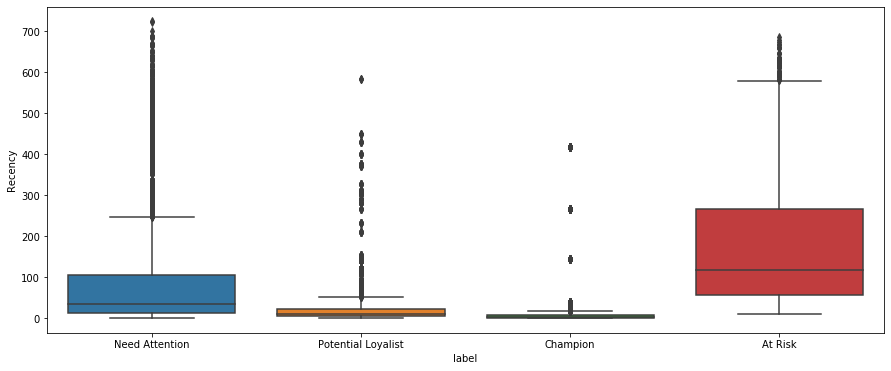

In [64]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y = 'Recency', data = RFM_scores)
plt.show()

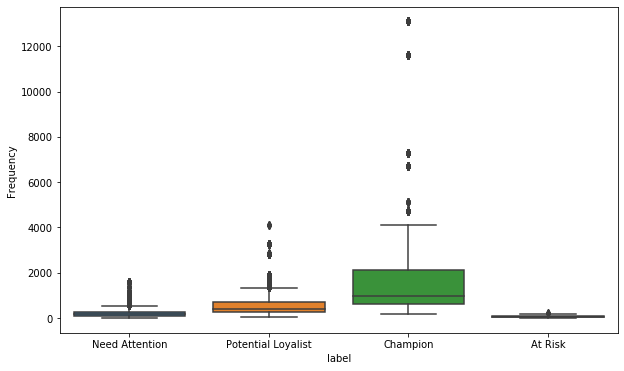

In [65]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y = 'Frequency', data = RFM_scores)
plt.show()

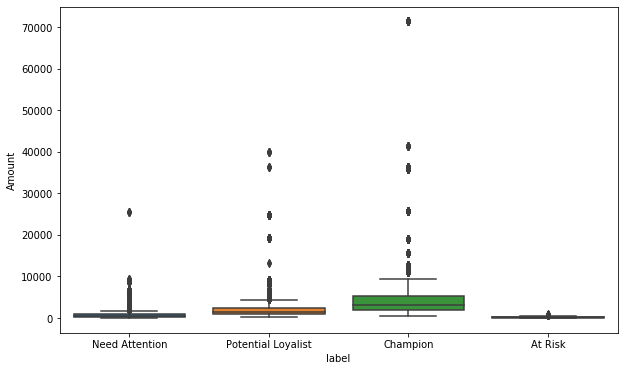

In [66]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y = 'Amount', data = RFM_scores)
plt.show()

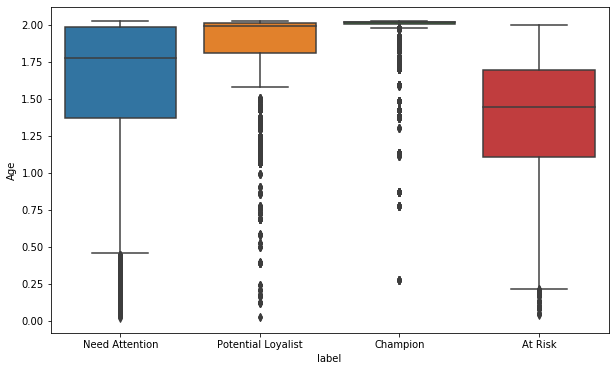

In [67]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y = 'Age', data = RFM_scores)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y = 'Frequency', data = RFM_scores)
plt.show()

In [ ]:
RFM_scores.to_csv('RFM_scores.csv')